# 0 Configuration

In [57]:
config= {
    "data_loading_disparate": {
        "loading": False,
        "study": False,
        "merging": False,
        "saving": False
    },
    "overview": {
        "overview_plot": True
    }
}

***
# 1 Dependencies import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(0)

In [3]:
def dataframe_distribution_overview(data, figsize=(10, 3)):
    plt.figure(figsize=figsize)

    sns.barplot(x=data.columns, y=data.count())

    plt.title("Number of values per column", size=20)
    plt.xticks(rotation=45, size=16, ha="right")
    plt.yticks(size=16)
    plt.ylabel("Number values", size=16)
    plt.show()

In [4]:
def index_lth(data, percentage: int):
    percentage = percentage / 100
    less_than = data.count() < data.shape[0] * percentage
    index_less_than = less_than[less_than == True].index
    return index_less_than

In [5]:
def multi_plot_numerical(data, features, kind="hist", n_cols=8, figsize=(30, 10), wspace=0.35, hspace=0.35):
    feature_nb = len(features)
    n_rows = ceil(feature_nb / n_cols)
    index = 0

    plt.subplots(n_rows, n_cols, figsize=figsize)
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

    for r in range(n_rows):
        for c in range(n_cols):
            if index >= feature_nb:
                break

            plt.subplot(n_rows, n_cols, index+1)

            feature = features[index]

            if kind == "box":
                plot = sns.boxplot(y=data[feature])
            elif kind == "hist":
                plot = sns.histplot(data=data[feature], kde=True)
            else:
                plot = sns.histplot(data=data[feature], kde=True)

            plot.set_xlabel(feature, fontsize=12)
            plot.set_ylabel(None)

            index += 1

    plt.show()

In [6]:
def create_subplot(dataset, feature, n_rows, index, is_numeric):
    plt.subplot(n_rows, 2, index)
    uniques = dataset[feature].unique()

    if is_numeric:
        plot = sns.boxplot(y=dataset[feature])
    else:
        if uniques.size <= 20 and uniques.size > 0:
            plot = sns.countplot(x=dataset[feature])
            plt.xticks(rotation=45, size=8, ha="right")
        else:
            dist = pd.DataFrame(data=[[uniques.size, dataset.shape[0] - uniques.size]], columns=["uniques", "not_uniques"])
            plot = sns.barplot(data=dist)

    plot.set_xlabel(None)
    plot.set_ylabel(feature, fontsize=14)


def dataset_diff_analysis(data1, data2, exclude=[], figsize=(15, 200)):
    features = data1.columns.union(data2.columns).difference(exclude)
    n_cols = 2
    n_rows = len(features)
    col_id = 0
    index = 1

    plt.subplots(n_rows, n_cols, figsize=figsize)
    plt.subplots_adjust(wspace=0.35, hspace=0.5)

    for f in features:
        is_numeric = False
        if f in data1.columns:
            f_type = data1[f].dtype
        else:
            f_type = data2[f].dtype
        if f_type in ["int64", "float64"]:
            is_numeric = True

        if f in data1.columns.values:
            create_subplot(data1, f, n_rows, index, is_numeric)
        if f in data2.columns.values:
            create_subplot(data2, f, n_rows, index+1, is_numeric)

        index += 2

    print(f"features: {features}")
    plt.show()

In [7]:
def decribe_several(feature, *df):
    data = {}
    index = 1
    for d in df:
        data[feature + "_" + str(index)] = d[feature]
        index += 1
    final_dataframe = pd.DataFrame(data)
    return final_dataframe.describe()

In [8]:
def head_several(feature, nb, *df):
    data = {}
    index = 1
    for d in df:
        data[feature + "_" + str(index)] = d[feature]
        index += 1
    final_dataframe = pd.DataFrame(data)
    return final_dataframe.head(nb)

In [9]:
class OutlierProcessor():
    def __init__(self, data, features, lower_trig, upper_trig):
        self.data = data
        self.features = features
        self.lower_trig = lower_trig
        self.upper_trig = upper_trig
        self.__above = 0
        self.__below = 0
        self.__total = 0

    def __print(self):
        print(f"lower_trig: {self.lower_trig}")
        print(f"upper_trig: {self.upper_trig}")
        print(f"below: {self.__below}")
        print(f"above: {self.__above}")
        print(f"total: {self.__total}")

    def analyse(self):
        self.__below = self.data[self.data[self.features] < self.lower_trig][self.features].count()
        self.__above = self.data[self.data[self.features] > self.upper_trig][self.features].count()
        self.__total = self.__below + self.__above
        self.__print()

    def replace(self, replace_by=np.nan, inplace=False):
        result = self.data.loc[:, self.features].where(cond=lambda x: ((x > self.lower_trig) & (self.upper_trig > x)), other=replace_by)
        if inplace:
            self.data[self.features] = result
        else:
            return result

In [10]:
class OutlierIqrProcessor(OutlierProcessor):
    def __init__(self, data, features, exclude=None):
        self.features = [feature for feature in features if feature not in exclude]
        self.__q1 = data[self.features].quantile(0.25)
        self.__q3 = data[self.features].quantile(0.75)
        self.__iqr = self.__q3 - self.__q1
        upper_trig = self.__q3 + (1.5 * self.__iqr)
        lower_trig = self.__q1 - (1.5 * self.__iqr)
        super().__init__(data, self.features, lower_trig, upper_trig)

In [11]:
def correlation_heatmap(dataset, figsize=(30, 20)):
    plt.figure(figsize=figsize)

    correlation = dataset.corr()
    mask = np.triu(np.ones_like(correlation, dtype=bool))

    sns.heatmap(data=correlation, mask=mask, annot=True, vmax=.75, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title("Correlation heatmap", size=20)
    plt.xticks(rotation=45, size=16, ha="right")
    plt.yticks(size=16)
    plt.show()

In [12]:
def unique_several(dataset, features, take=20):
    uniques_data = {}
    too_many_uniques = []
    only_one_uniques = []
    only_two_uniques = []

    for f in features:
        f_uniques = dataset[f].unique()
        if f_uniques.size <= take:
            if f_uniques.size == 1:
                only_one_uniques.append(f)
            elif f_uniques.size == 2:
                only_two_uniques.append(f)
            else:
                uniques_data[f] = pd.Series(data=f_uniques, name=f, dtype="object")
        else:
            too_many_uniques.append((f, f_uniques.size))

    print(f"Only one unique: {only_one_uniques}")
    print(f"Only two uniques: {only_two_uniques}")
    print(f"Too many uniques: {too_many_uniques}")

    return pd.DataFrame(data=uniques_data)

In [13]:
def strip_and_lower(dataset, features, to_strip=None, inplace=False):
    result_data = {}
    for f in features:
        result_data[f] = pd.Series(data=dataset[f].str.strip(to_strip=to_strip), name=f, dtype="object")
        result_data[f] = result_data[f].str.lower()
    result = pd.DataFrame(data=result_data)
    if inplace:
        dataset[features] = result
    else:
        return result

In [14]:
def fuzzy_matching_several(dataset, fuzzy, limit=10):
    fuzzy_data = {}
    for feature, match in fuzzy:
        fuzzy_matches = fuzzywuzzy.process.extract(match, dataset[feature], limit=limit, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
        fuzzy_data[feature] = pd.Series(data=fuzzy_matches, name=feature, dtype="object")
    return pd.DataFrame(data=fuzzy_data)

In [15]:
def feature_distribution_multivar(data, features, figsize=(10, 3), wspace=0.2, hspace=0.2, corr_scale=(0.75, 0), xlim=(None, None), ylim=(None, None)):
    plt.subplots(1, 2, figsize=figsize)
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

    plt.subplot(1, 2, 1)
    for f in features:
        plot = sns.kdeplot(data=data[f], label=f, shade=True)

    plt.title(f"Distribution", size=20)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.xlabel(None)
    plt.ylabel("Density", size=16)
    plt.legend()

    plt.subplot(1, 2, 2)
    correlation = data.loc[:, features].corr()
    mask = np.triu(np.ones_like(correlation, dtype=bool))

    sns.heatmap(data=correlation, mask=mask, annot=True, vmax=corr_scale[0], center=corr_scale[1],
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title(f"Correlation", size=20)
    plt.xticks(rotation=45, size=12, ha="right")
    plt.yticks(rotation=0, size=12, va="center")
    
    plt.show()

***
# 2 Data Loading disparate

## 2.1 Loading

In [16]:
if config["data_loading_disparate"]["loading"]:
    customers = pd.read_csv("data/olist_customers_dataset.csv", delimiter=",")
    geoloc = pd.read_csv("data/olist_geolocation_dataset.csv", delimiter=",")
    items = pd.read_csv("data/olist_order_items_dataset.csv", delimiter=",")
    payments = pd.read_csv("data/olist_order_payments_dataset.csv", delimiter=",")
    reviews = pd.read_csv("data/olist_order_reviews_dataset.csv", delimiter=",")
    orders = pd.read_csv("data/olist_orders_dataset.csv", delimiter=",")
    products = pd.read_csv("data/olist_products_dataset.csv", delimiter=",")
    sellers = pd.read_csv("data/olist_sellers_dataset.csv", delimiter=",")
    category = pd.read_csv("data/product_category_name_translation.csv", delimiter=",")

***
## 2.2 Overview

### 2.2.1 Customers

In [17]:
if config["data_loading_disparate"]["study"]:
    customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
if config["data_loading_disparate"]["study"]:
    customers.describe(include="all")

In [19]:
if config["data_loading_disparate"]["study"]:
    customers.drop_duplicates(subset=["customer_unique_id"], inplace=True)
    # customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix", "customer_city": "city", "customer_state": "state"}, inplace=True)

In [20]:
if config["data_loading_disparate"]["study"]:
    customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               96096 non-null  object
 1   customer_unique_id        96096 non-null  object
 2   customer_zip_code_prefix  96096 non-null  int64 
 3   customer_city             96096 non-null  object
 4   customer_state            96096 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.4+ MB


***
### 2.2.2 Geolocation

In [21]:
if config["data_loading_disparate"]["study"]:
    geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [22]:
if config["data_loading_disparate"]["study"]:
    geoloc.describe(include="all")

In [23]:
if config["data_loading_disparate"]["study"]:
    geoloc.drop_duplicates(subset=["geolocation_lat", "geolocation_lng"], inplace=True)
    # geoloc.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix", "geolocation_city": "city", "geolocation_state": "state"}, inplace=True)

In [24]:
if config["data_loading_disparate"]["study"]:
    geoloc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718463 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  718463 non-null  int64  
 1   geolocation_lat              718463 non-null  float64
 2   geolocation_lng              718463 non-null  float64
 3   geolocation_city             718463 non-null  object 
 4   geolocation_state            718463 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 32.9+ MB


***
### 2.2.3 Items

In [25]:
if config["data_loading_disparate"]["study"]:
    items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
if config["data_loading_disparate"]["study"]:
    items.describe(include="all")

In [27]:
if config["data_loading_disparate"]["study"]:
    items.drop_duplicates(subset=["order_id"], inplace=True)

In [28]:
if config["data_loading_disparate"]["study"]:
    items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             98666 non-null  object 
 1   order_item_id        98666 non-null  int64  
 2   product_id           98666 non-null  object 
 3   seller_id            98666 non-null  object 
 4   shipping_limit_date  98666 non-null  object 
 5   price                98666 non-null  float64
 6   freight_value        98666 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


***
### 2.2.4 Payments

In [29]:
if config["data_loading_disparate"]["study"]:
    payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
if config["data_loading_disparate"]["study"]:
    payments.describe(include="all")

In [31]:
if config["data_loading_disparate"]["study"]:
    payments.drop_duplicates(subset=["order_id"], inplace=True)

In [32]:
if config["data_loading_disparate"]["study"]:
    payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99440 non-null  object 
 1   payment_sequential    99440 non-null  int64  
 2   payment_type          99440 non-null  object 
 3   payment_installments  99440 non-null  int64  
 4   payment_value         99440 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


***
### 2.2.5 Reviews

In [33]:
if config["data_loading_disparate"]["study"]:
    reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [34]:
if config["data_loading_disparate"]["study"]:
    reviews.describe(include="all")

In [35]:
if config["data_loading_disparate"]["study"]:
    reviews.drop_duplicates(subset=["order_id"], inplace=True)

In [36]:
if config["data_loading_disparate"]["study"]:
    reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98673 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                98673 non-null  object
 1   order_id                 98673 non-null  object
 2   review_score             98673 non-null  int64 
 3   review_comment_title     11551 non-null  object
 4   review_comment_message   40785 non-null  object
 5   review_creation_date     98673 non-null  object
 6   review_answer_timestamp  98673 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.0+ MB


***
### 2.2.6 Orders

In [37]:
if config["data_loading_disparate"]["study"]:
    orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
if config["data_loading_disparate"]["study"]:
    orders.describe(include="all")

In [39]:
if config["data_loading_disparate"]["study"]:
    orders.drop_duplicates(subset=["order_id"], inplace=True)

In [40]:
if config["data_loading_disparate"]["study"]:
    orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


***
### 2.2.7 Products

In [41]:
if config["data_loading_disparate"]["study"]:
    products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
if config["data_loading_disparate"]["study"]:
    products.describe(include="all")

In [43]:
if config["data_loading_disparate"]["study"]:
    products.drop_duplicates(subset=["product_id"], inplace=True)

In [44]:
if config["data_loading_disparate"]["study"]:
    products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


***
### 2.2.8 Sellers

In [45]:
if config["data_loading_disparate"]["study"]:
    sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
if config["data_loading_disparate"]["study"]:
    sellers.describe(include="all")

In [47]:
if config["data_loading_disparate"]["study"]:
    sellers.drop_duplicates(subset=["seller_id"], inplace=True)

In [48]:
if config["data_loading_disparate"]["study"]:
    sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 120.9+ KB


***
### 2.2.9 Category

In [49]:
if config["data_loading_disparate"]["study"]:
    category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [50]:
if config["data_loading_disparate"]["study"]:
    category.describe(include="all")

In [51]:
if config["data_loading_disparate"]["study"]:
    category.drop_duplicates(inplace=True)

In [52]:
if config["data_loading_disparate"]["study"]:
    category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


***
## 2.3 Merging

In [53]:
if config["data_loading_disparate"]["merging"]:
    data = orders.merge(customers, on="customer_id")
    data = data.merge(reviews, on="order_id")
    data = data.merge(payments, on="order_id")
    data = data.merge(items, on="order_id")
    data = data.merge(products, on="product_id")
    data = data.merge(sellers, on="seller_id")
    # data = data.merge(geoloc, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", suffixes=("", "_ customer"))
    # data = data.merge(geoloc, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", suffixes=("", "_seller"))

    data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94655 entries, 0 to 94654
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       94655 non-null  object 
 1   customer_id                    94655 non-null  object 
 2   order_status                   94655 non-null  object 
 3   order_purchase_timestamp       94655 non-null  object 
 4   order_approved_at              94641 non-null  object 
 5   order_delivered_carrier_date   93698 non-null  object 
 6   order_delivered_customer_date  92637 non-null  object 
 7   order_estimated_delivery_date  94655 non-null  object 
 8   customer_unique_id             94655 non-null  object 
 9   customer_zip_code_prefix       94655 non-null  int64  
 10  customer_city                  94655 non-null  object 
 11  customer_state                 94655 non-null  object 
 12  review_id                      94655 non-null 

In [54]:
if config["data_loading_disparate"]["merging"] and False:
    data = data.merge(geoloc, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", suffixes=("_customer", "_customer"))

    data.info()

In [55]:
if config["data_loading_disparate"]["merging"] and False:
    data = data.merge(geoloc, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", suffixes=("_seller", "_seller"))

    data.info()

***
## 2.4 Saving

In [56]:
if config["data_loading_disparate"]["saving"]:
    data.to_csv("data/data_merged.csv", sep=",")

***
# 3 Data loading merged

In [58]:
data = pd.read_csv("data/data_merged.csv", delimiter=",")

***
# 4 Overview

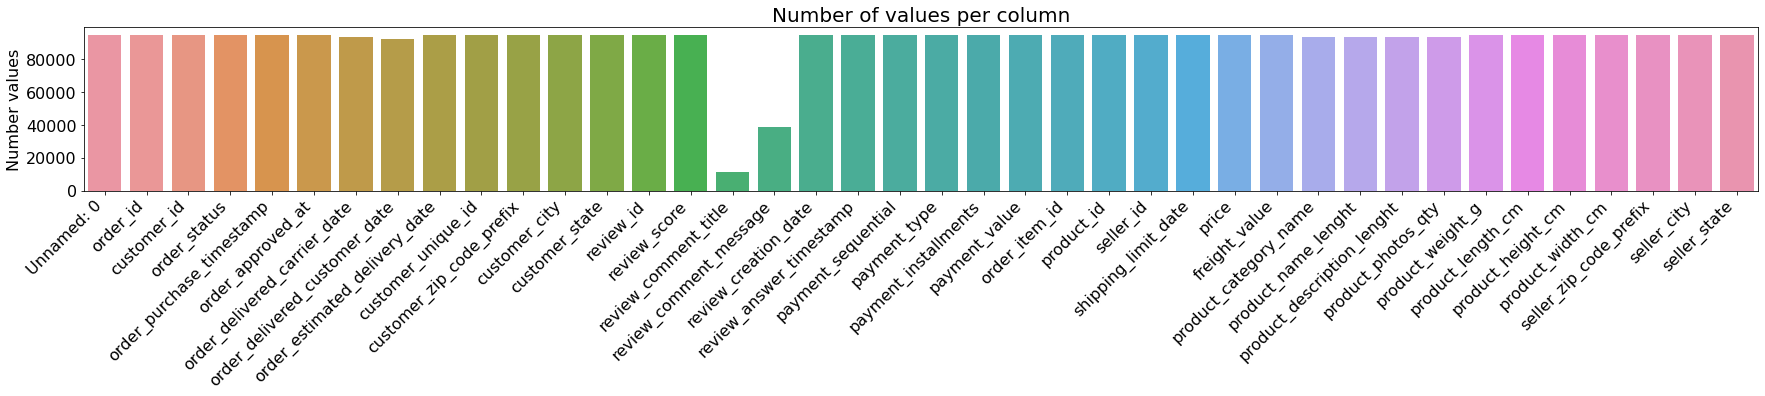

In [59]:
if config["overview"]["overview_plot"]:
    dataframe_distribution_overview(data, figsize=(30, 3))

***
# X Saving

In [60]:
data.to_csv("data/data_cleaned.csv", sep=",")